# Supervised ML Pipeline

## Problem Statement

The objective of this notebook is to build and evaluate a supervised machine learning pipeline for a regression task on structured housing data, following correct ML practices from data exploration to model evaluation.


### 1.1 Libraries imports

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

### 1.2 Load Dataset

In [2]:
def load_dataset(file_name, target_col):
    X = pd.read_csv(file_name)
    y = X[target_col]
    X.drop(target_col, axis=1, inplace=True)
    return X ,y
    

In [3]:
file_name = 'housing_train.csv'
X_train, y_train = load_dataset(file_name,'MedHouseVal')

X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11


In [4]:
file_name = 'housing_test.csv'
X_test, y_test = load_dataset(file_name,'MedHouseVal')

X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99


In [5]:
train_data = pd.concat([X_train, y_train], axis=1)

### 1.3 EDA

  

### 1.3.1 Basic Data Overview:

**shape:**  
Using shape function to know how many rows and cols the dataset has.

In [6]:
train_data.shape

(16512, 9)

**nunique:**  
Using nunique function to know how many unique values each col has.

In [7]:
train_data.nunique()

MedInc         10921
HouseAge          52
AveRooms       15652
AveBedrms      11945
Population      3639
AveOccup       15305
Latitude         842
Longitude        829
MedHouseVal     3675
dtype: int64

**Info:**  
Using Info function to know the data type of each column.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


**Describe:**  
Use the describe() function to display statistics for each column.  
Adding include='all' includes non-numeric columns in the summary.

In [9]:
train_data.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


**corr:**  
Shows the relationships between features, helping identify which features are strongly related.  
This can guide feature selection and improve model performance by reducing redundancy and uncovering important patterns in data.

<Axes: >

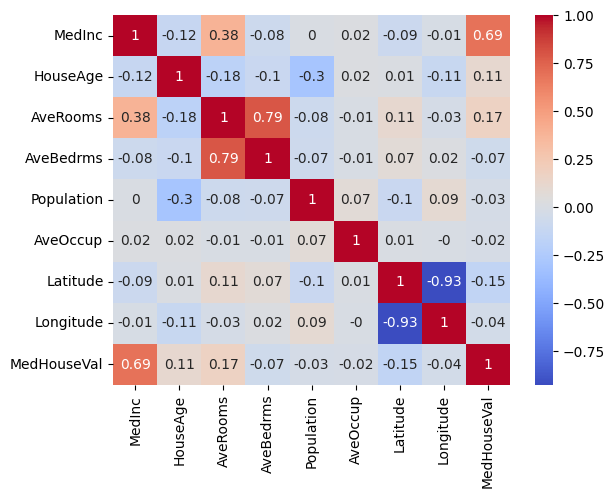

In [10]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=corr_matrix.round(2), cmap='coolwarm', fmt='g',annot_kws={"size": 10})

**Boxplot:**  
    Generates a grid of boxplots for each feature in the DataFrame.

    Parameters:
    - None.
    
    Returns:
    - None: Displays the boxplots for each feature in the DataFrame.

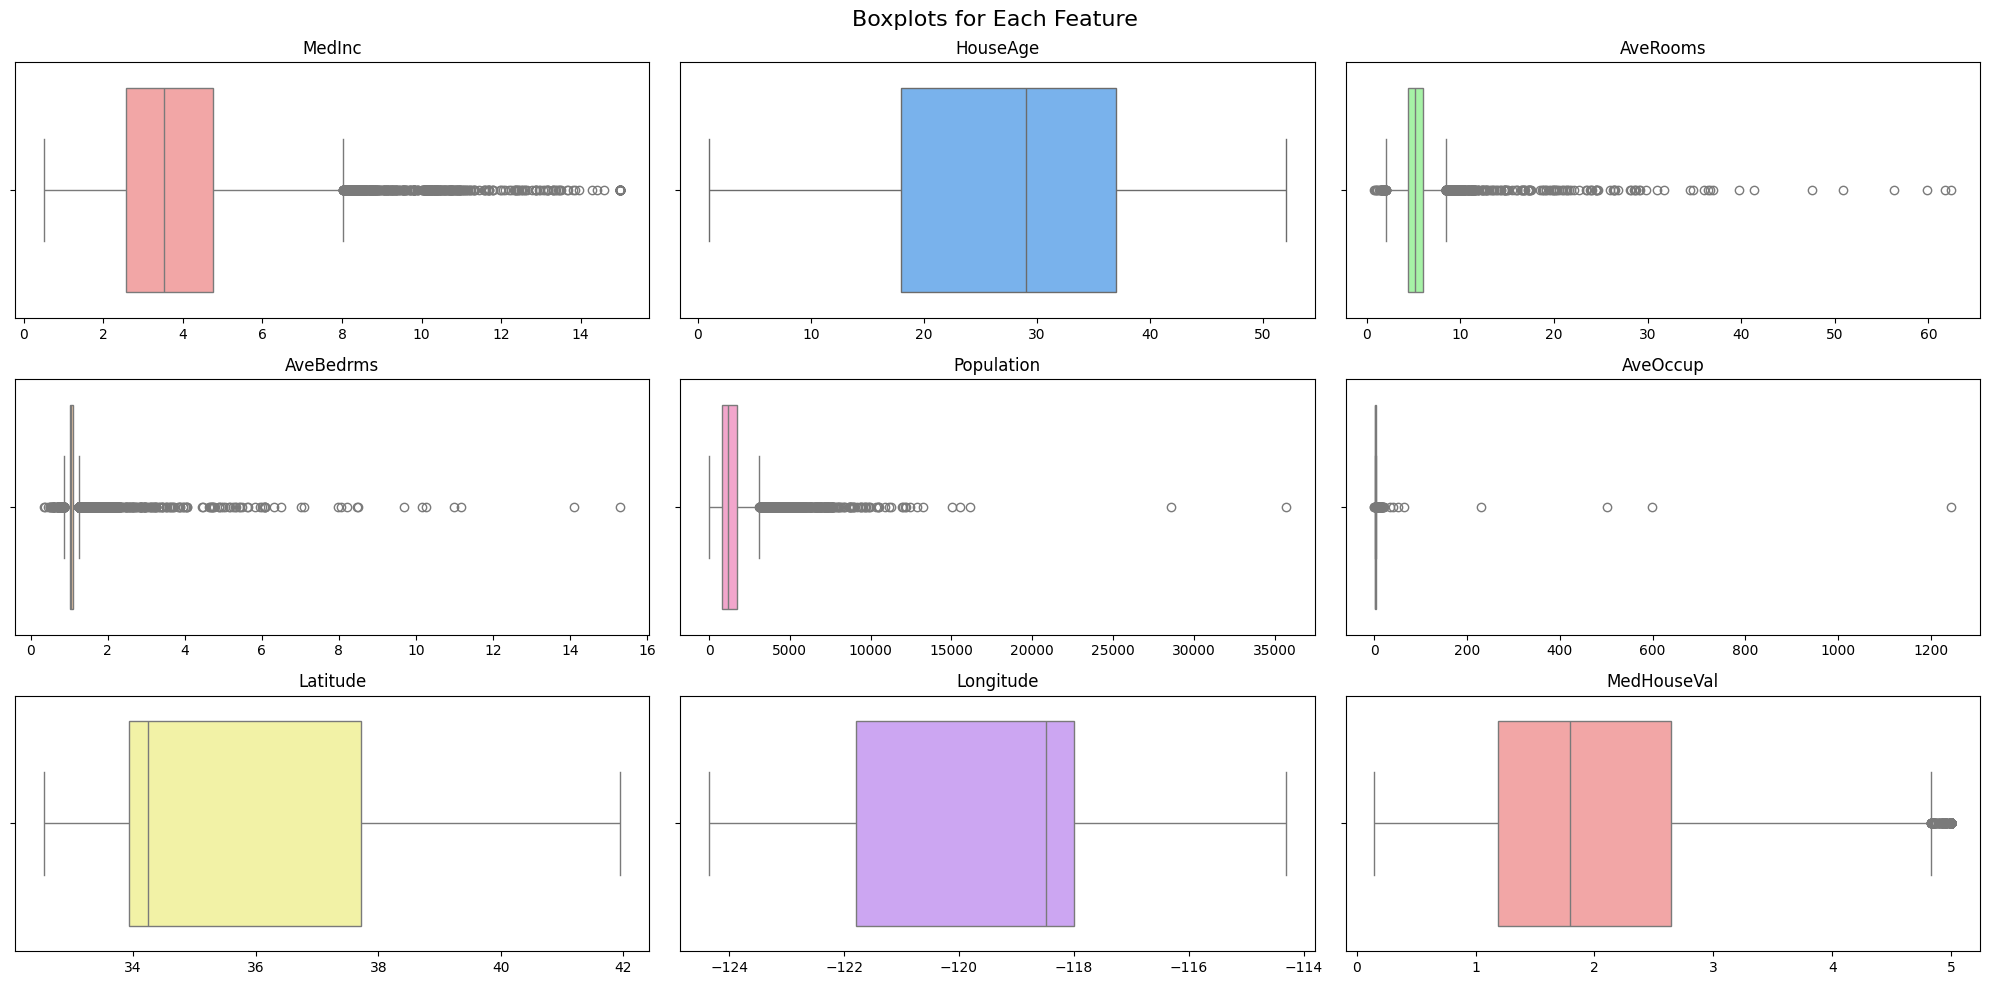

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Boxplots for Each Feature', fontsize=16)

axes = axes.flatten()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#FFFF99', '#CC99FF']

for i, column in enumerate(train_data.columns):
    color = colors[i % len(colors)] 
    sns.boxplot(x=train_data[column], ax=axes[i], color=color)
    axes[i].set_title(column)
    axes[i].set_xlabel('')  # Remove x-label as it's redundant

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Hist:**  
Generates a grid of histograms for each numerical feature in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing numerical features to plot.
    - bins (int): The number of bins to use for the histograms.
    
    Returns:
    None: Displays the histograms for each numerical feature in the DataFrame.

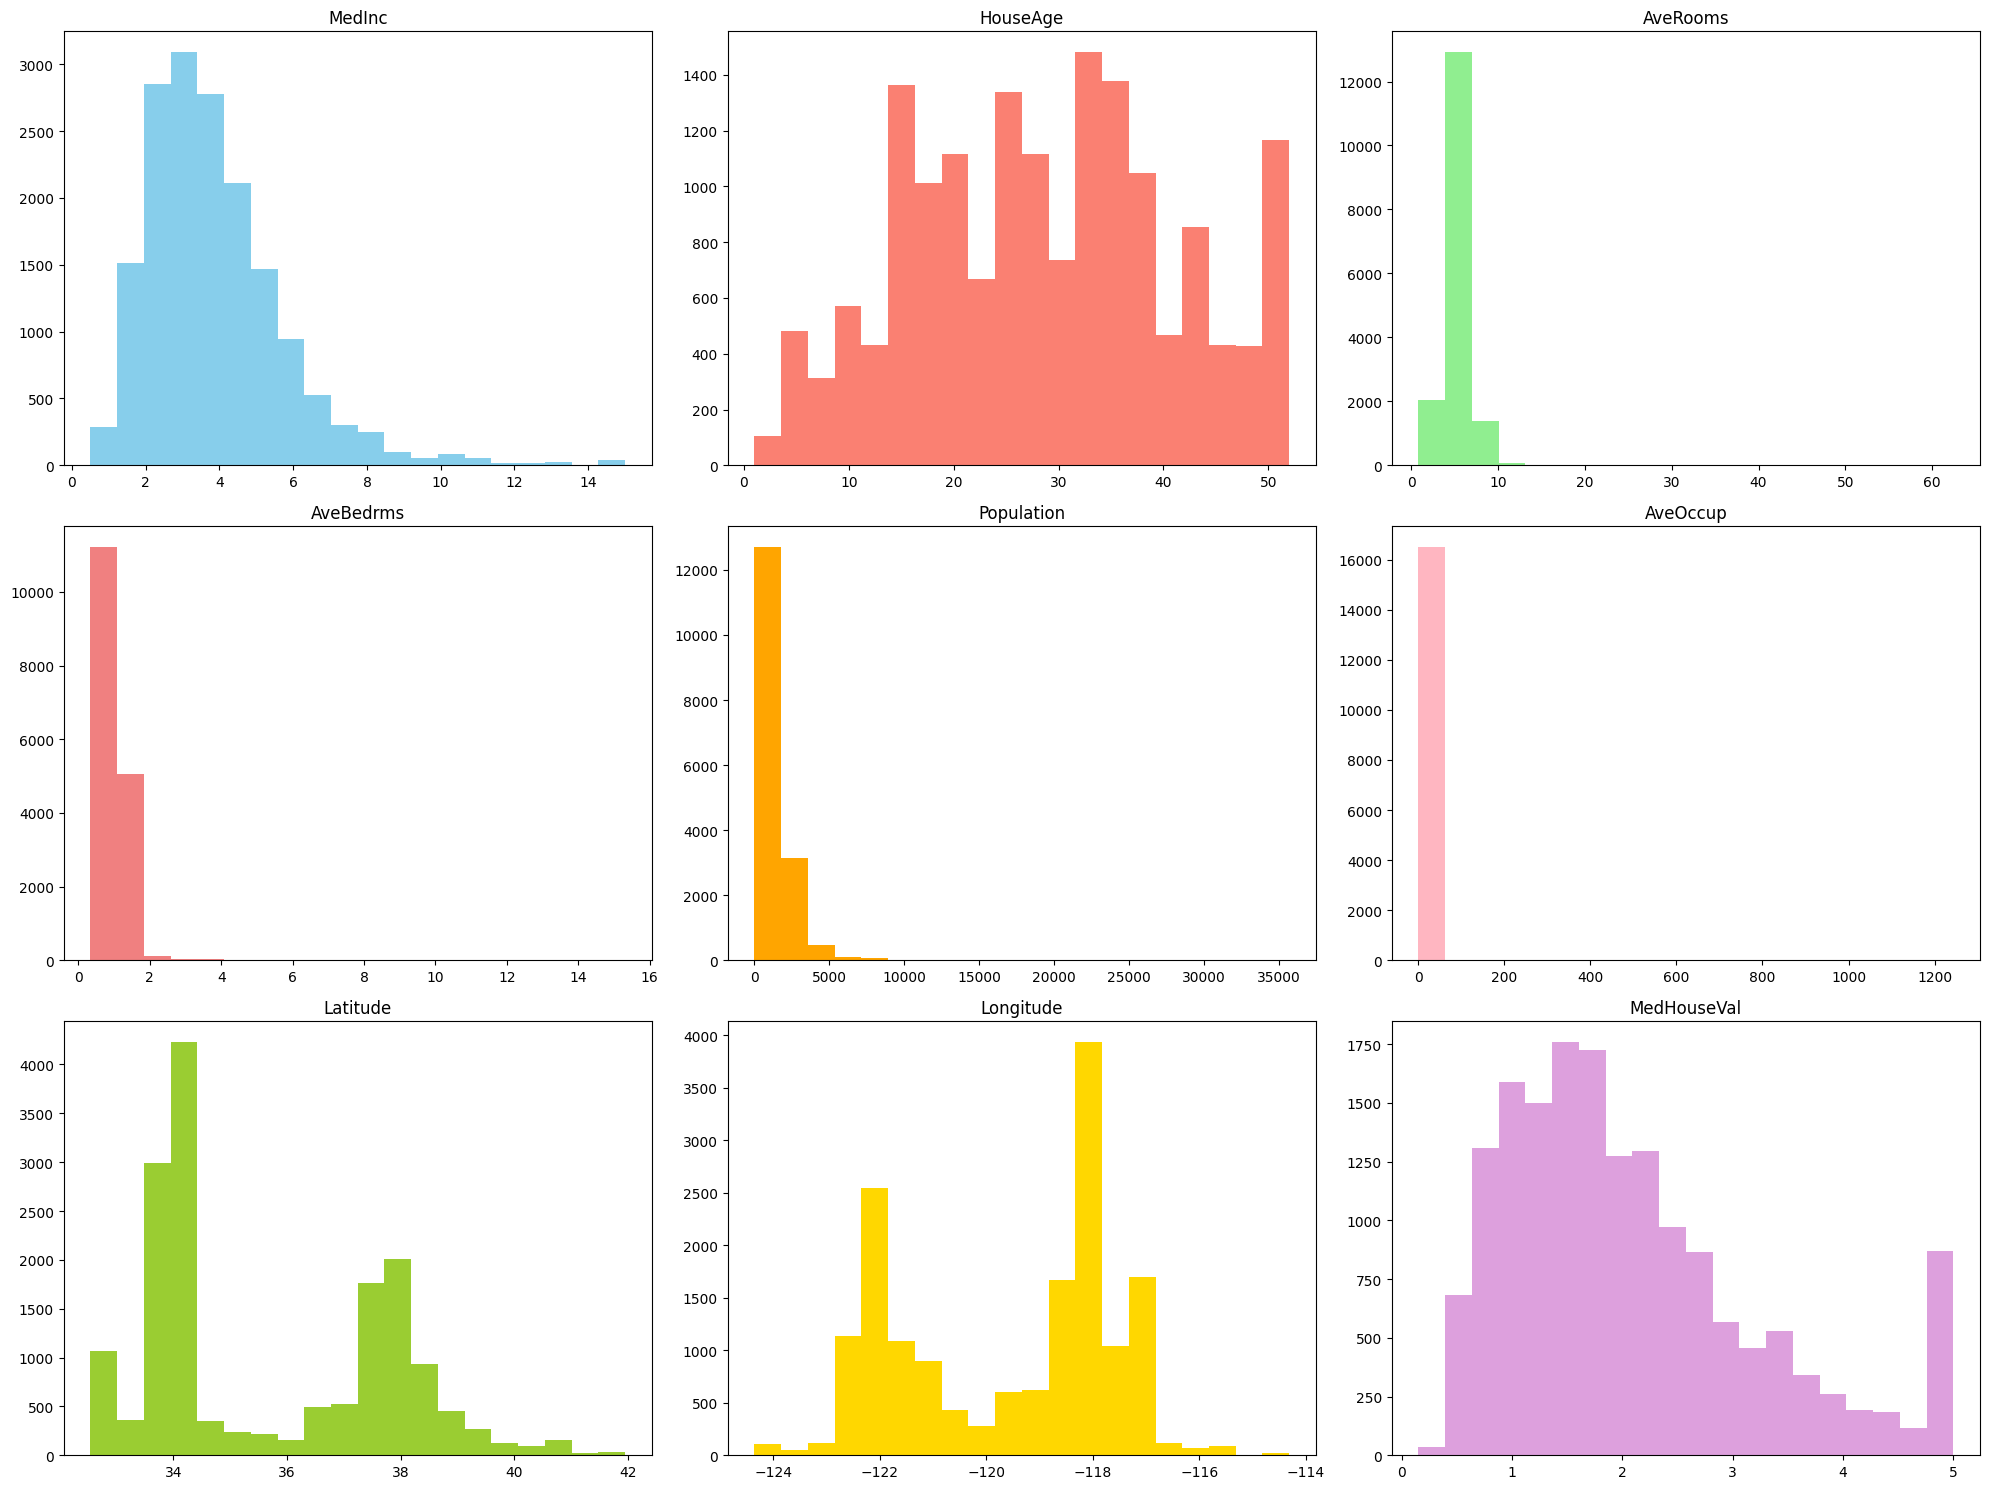

In [12]:

def hist(df, bins):
    # List of colors for the histograms
    colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'orange', 'lightpink', 
              'yellowgreen', 'gold', 'plum', 'turquoise']
    
    # Create a figure with subplots
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15)) 
    axes = axes.ravel()
    
    # Plot histograms for each column with a different color
    for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
        color = colors[i % len(colors)]  # Cycle through the colors if there are more columns than colors
        axes[i].hist(df[column], bins=bins, color=color)
        axes[i].set_title(column)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

hist(train_data, 20)

### 1.3.2 Outliers Removing  


**IQR:**  
Clean outliers from the data according to IQR method

In [13]:
Q1 = X_train.quantile(0.1)
Q3 = X_train.quantile(0.9)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
X_cln = X_train[~((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)]
y_cln = y_train[X_cln.index]

X_cln.shape

(15788, 8)

**Z-SCORE:**  
Clean outliers from the data according toz-scoreR method

In [14]:
from scipy import stats

z_scores = np.abs(stats.zscore(X_train))
threshold = 3
X_cln_z = X_train[(z_scores < threshold).all(axis=1)]
y_cln_z = y_train[X_cln_z.index]

X_cln_z.shape


(15821, 8)

**Boxplot:**  
    Generates a grid of boxplots for each feature in the DataFrame.

    Parameters:
    - None.
    
    Returns:
    - None: Displays the boxplots for each feature in the DataFrame.

    Note:
    Here the data is shown after outliers cleaning (using IQR)

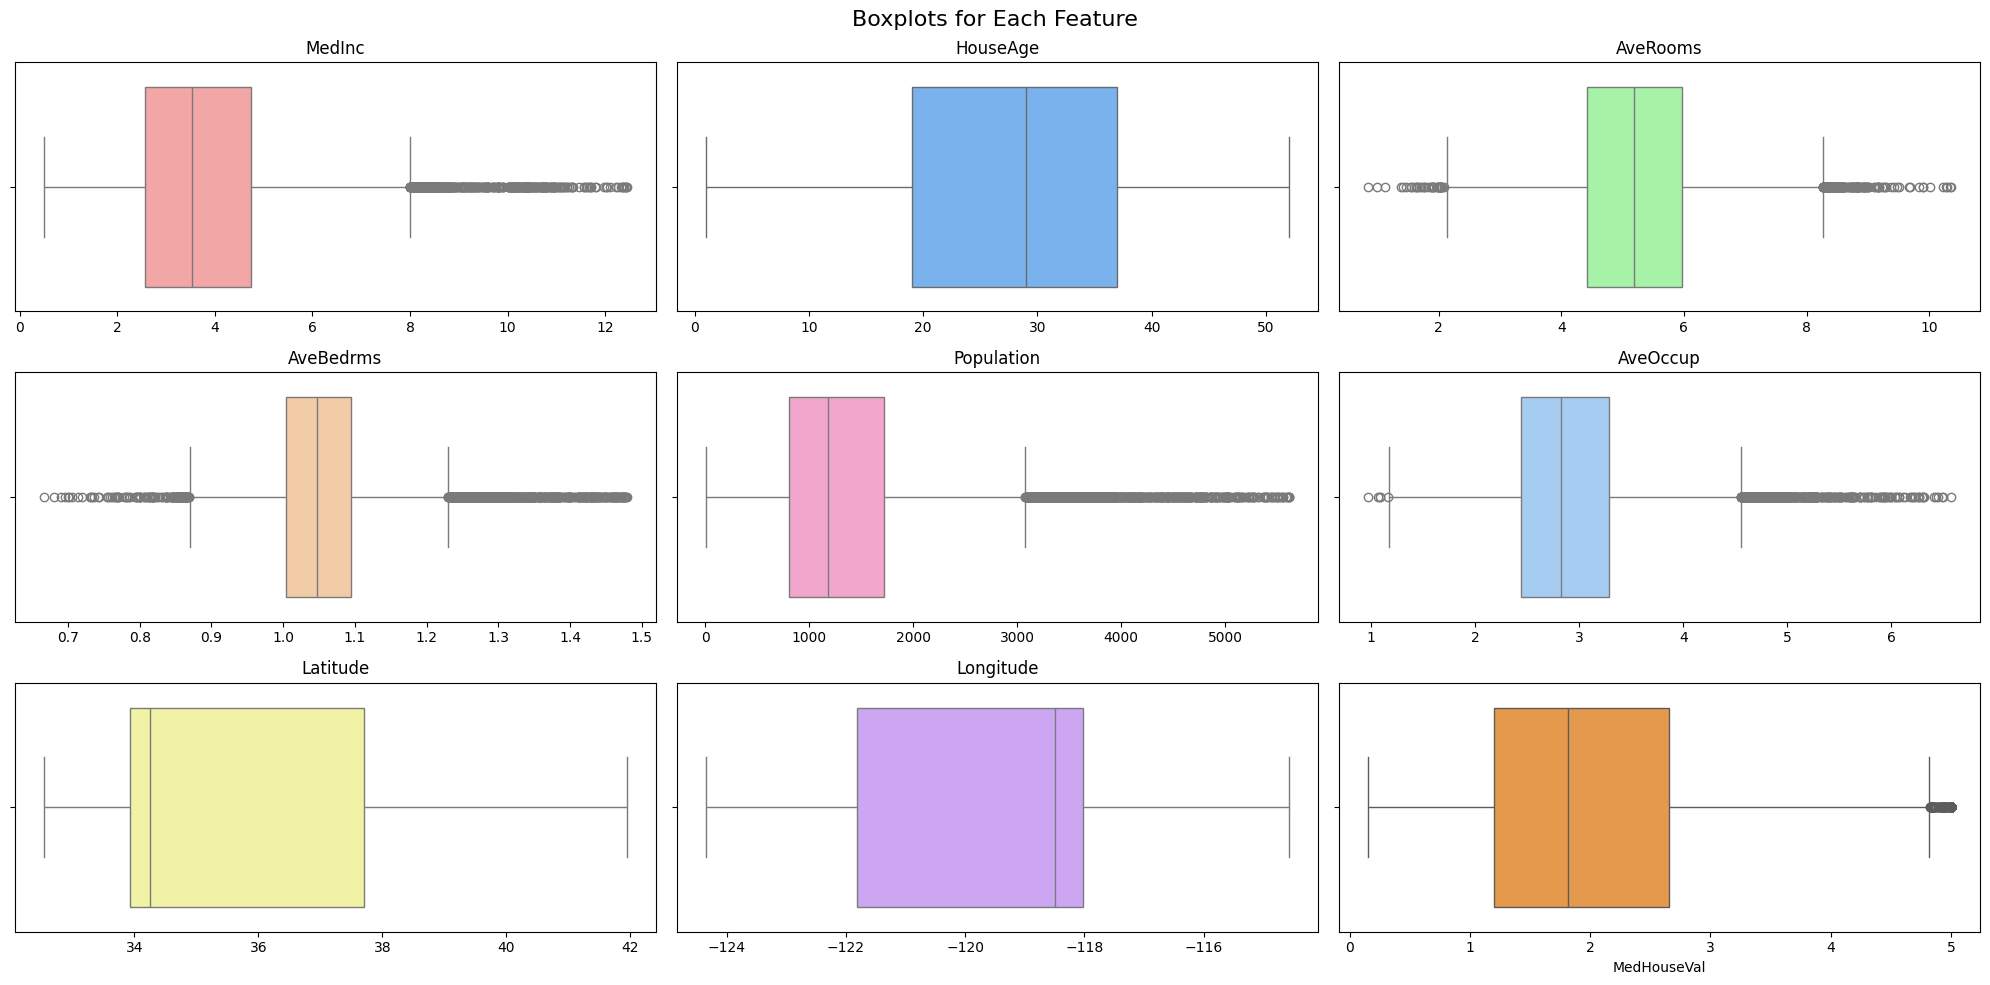

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.suptitle('Boxplots for Each Feature', fontsize=16)

axes = axes.flatten()
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC', '#99CCFF', '#FFFF99', '#CC99FF']

for i, column in enumerate(X_cln.columns):
    color = colors[i % len(colors)] 
    sns.boxplot(x=X_cln[column], ax=axes[i], color=color)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
sns.boxplot(x=y_cln, ax=axes[8], color='#FF9932')
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### **Conclusion from Basic Data Analysis:**  

General:  
All features need scaling due to differing scales.

- MedInc: Shows positive skew; apply a log transformation.
- AveRooms, AvgBedrms, Population, AvgOccup: Highly concentrated; require scaling or additional scaled features.
- Latitude and Longitude: Exhibit a high negative correlation (-93); consider adding neighborhood features based on clustering.
- MedInc and AveRooms: Display high correlation; add interaction features between them.

**Adding more features improves the model prediction**

## Part 2 - Experiment

### 2.1 Feature Engineering

The following are available datasets for feature engineering:

- X_cln: Cleaned feature data using IQR.
- y_cln: Target values corresponding to X_cln.
- X_cln_z: Cleaned feature data using z-score.
- y_cln_z: Target values corresponding to X_cln_z.

### 2.1.1 Features Adding

**Elbow:**  
The optimal number of clusters is selected by examining the inertia curve and identifying the elbow point where additional clusters provide diminishing returns.

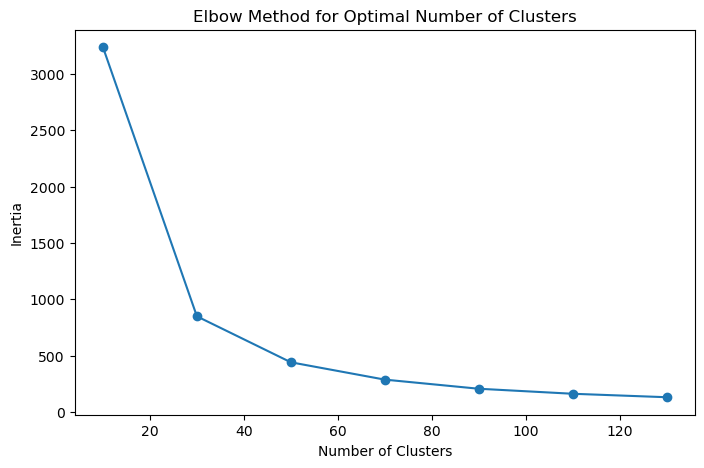

In [19]:
from sklearn.cluster import KMeans

# Define a range for the number of clusters to try
cluster_range = range(10, 150, 20)
inertias = []

# Compute inertia for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cln[['Latitude', 'Longitude']])
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


**"Neighborhood"**  
Creating a new Feature "Neighborhood" using KMeans clustering to latitude and longitude.  
For helping the model capture location-based patterns.

In [148]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=95)

X_train_egnd = X_cln.assign(Neighborhood = kmeans.fit_predict(X_cln[['Latitude', 'Longitude']]))
X_test_egnd = X_test.assign(Neighborhood = kmeans.fit_predict(X_test[['Latitude', 'Longitude']]))

**Features adding for X_train.**

In [149]:
X_train_egnd = X_train_egnd.assign(
    Log_Population=np.log1p(X_train_egnd['Population']),
    log_AvgRooms=np.log1p(X_train_egnd['AveRooms']),
    log_AvgOccup=np.log1p(X_train_egnd['AveOccup']),
    NumOfHouses=X_train_egnd['Population'] / X_train_egnd['AveOccup'],
    MedInc_AvgRooms=X_train_egnd['MedInc'] * X_train_egnd['AveRooms']
)

**Features adding for X_test.**

In [150]:
X_test_egnd = X_test_egnd.assign(
    Log_Population=np.log1p(X_test_egnd['Population']),
    log_AvgRooms=np.log1p(X_test_egnd['AveRooms']),
    log_AvgOccup=np.log1p(X_test_egnd['AveOccup']),
    NumOfHouses=X_test_egnd['Population'] / X_test_egnd['AveOccup'],
    MedInc_AvgRooms=X_test_egnd['MedInc'] * X_test_egnd['AveRooms']
)

### 2.1.2 Features Scaling

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

**Scaling by normalization**

In [151]:
scaler = StandardScaler()
X_train_egnd_norm = pd.DataFrame(scaler.fit_transform(X_train_egnd), columns=X_train_egnd.columns)
y_train_norm  = (y_cln - y_cln.mean())/y_cln.std()

In [152]:
scaler = StandardScaler()
X_test_egnd_norm = pd.DataFrame(scaler.fit_transform(X_test_egnd), columns=X_test_egnd.columns)
y_test_norm = (y_test - y_test.mean()) / y_test.std()

**Scaling by min-max**

In [153]:
scaler = MinMaxScaler()
X_train_egnd_minMax = pd.DataFrame(scaler.fit_transform(X_train_egnd), columns=X_train_egnd.columns)

y_train_min = y_cln.min()
y_train_max = y_cln.max()

y_train_minMax = (y_cln - y_train_min) / (y_train_max - y_train_min)

In [154]:
scaler = MinMaxScaler()
X_test_egnd_minMax = pd.DataFrame(scaler.fit_transform(X_test_egnd), columns=X_test_egnd.columns)

y_test_min = y_test.min()
y_test_max = y_test.max()

y_test_minMax = (y_test - y_test_min) / (y_test_max - y_test_min)

### 2.1.3 Testing

In [106]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

**1st Option:**  
* Model - Linear Regression
* Dataset - scaled (normalizied, min-max) + feautes adding

In [155]:
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

reg = LinearRegression()
scores = cross_val_score(reg, X_train_egnd_minMax, y_train_minMax, cv=k_folds, scoring='r2')
print("Average Linear Regression Score (r2): ", scores.mean())

Average Linear Regression Score (r2):  0.6950328839015973


|   #   | IQR(0.25,0.75) | IQR(0.1,0.9)   | Z-Score | Features Adding | scaling       | n-spilts=10| Linear Regression |
|-------|----------------|----------------|---------|-----------------|---------------|------------|-------------------|
|   1   |       +        |                |         |                 |               |            |       0.637       |
|   2   |                |                |    +    |                 |               |            |       0.624       |
|   3   |                |       +        |         |                 |               |            |       0.673       |
|   4   |                |       +        |         |       +         |               |            |       0.694       |
|   5   |                |       +        |         |       +         |       +       |            |       0.694       |
|   6   |                |       +        |         |       +         |       +       |      +     |     **0.695**     |


**Conclusion**  
Linear Regression model score is 0.695 (including Ridge model).

**2nd Option**  
* Model - KNN
* Dataset - scaled (normalizied, min-max) + feautes adding

In [104]:
knn_reg = KNeighborsRegressor(n_neighbors=9)

# Perform cross-validation
scores = cross_val_score(knn_reg, X_train_egnd_minMax, y_train_minMax, cv=k_folds, scoring='r2')
print("KNN Regression Average Score (r2): ", scores.mean())

KNN Regression Average Score (r2):  0.7553836944482704


|   #   | IQR(0.25,0.75) | IQR(0.1,0.9)   | Z-Score | Features Adding | scaling       |n_neighbors=9|    KNN    |
|-------|----------------|----------------|---------|-----------------|---------------|-------------|-----------|
|   1   |       +        |                |         |                 |               |             |  0.046    |
|   2   |                |                |    +    |                 |               |             |  0.082    |
|   3   |                |       +        |         |                 |               |             |  0.113    |
|   4   |                |       +        |         |       +         |               |             |  0.374    |
|   5   |                |       +        |         |       +         |       +       |             |  0.744    |
|   6   |                |       +        |         |       +         |       +       |      +      | **0.755** |


**Conclusion**  
KNN model score is: **0.755**.  
The best scaling in min-max

**3rd Option:**  
* Model - Random Forst
* Dataset:
    1. Scaled (normalizied, min-max) + feautes adding
    2. Raw Data

In [97]:
rf_reg = RandomForestRegressor()

k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_reg, X_train_egnd_minMax, y_train_minMax, cv=k_folds, scoring='r2')

print("Average CV Score (r2): ", scores.mean())

Average CV Score (r2):  0.8062859283526755


In [98]:
rf_reg = RandomForestRegressor()

k_folds = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_reg, X_train, y_train, cv=k_folds, scoring='r2')

print("Average CV Score (r2): ", scores.mean())

Average CV Score (r2):  0.8025336068020353


In [99]:
rf_reg = RandomForestRegressor(
    n_estimators=150,
    max_depth=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)

rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print("R² Score: ", r2_score(y_test, y_pred))

R² Score:  0.8323458292148602


**Conclusion**

Random Forest (precessed data): 0.806  
Random Forset (raw data): 0.802  
Random Forest prediction: 0.832  

**This model achieves the highest score but is not adopted due to its high computational demands.**

## Part 3 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [100]:
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

reg = LinearRegression()
scores = cross_val_score(reg, X_train_egnd_minMax, y_train_minMax, cv=k_folds, scoring='r2')
print("Average Linear Regression Score (r2): ", scores.mean())

Average Linear Regression Score (r2):  0.6950071430693309


## Part 4 - Apply on test and show model performance estimation

In [161]:
reg.fit(X_train_egnd_minMax, y_train_minMax)

y_pred = reg.predict(X_test_egnd_minMax)

print("R² Score: ", r2_score(y_test_minMax, y_pred))

R² Score:  0.41795654720203745


In [162]:
print(y_pred[:5])

[ 0.68362354  0.62605644  0.60711873  0.34290263 -0.03829815]


### 4.1 **Summary Table:**  

In [165]:
# Model results
results = {
    "KNN": {"fit": 0.755, "r2 score": 0.16},
    "Linear Regression": {"fit": 0.695, "r2 score": 0.423},
    "Random Forest (processed)": {"fit": 0.806, "r2 score": 0.82},
    "Random Forest (raw data)": {"fit": 0.802, "r2 score": 0.832}
}

df_table = pd.DataFrame.from_dict(results, orient='index')

df_table.reset_index(inplace=True)
df_table.columns = ['Model', 'Fit', 'R² Score']

df_table = df_table.sort_values('R² Score', ascending=True)

df_table

,Model,Fit,R² Score
0,KNN,0.755,0.160
1,Linear Regression,0.695,0.423
2,Random Forest (processed),0.806,0.820
3,Random Forest (raw data),0.802,0.832


## Model Selection Summary

Multiple models were evaluated across both training and prediction phases.

- **KNN** achieved strong results on preprocessed data during training but showed weaker generalization at prediction time.
- **Linear Regression** demonstrated more stable and consistent performance during prediction and was therefore selected as the final model.

Although **Random Forest** achieved the highest overall score (≈ **0.83**) on both training and test sets without requiring preprocessing, it was not selected due to practical considerations.

### Final Decision Rationale
The Linear Regression model was chosen based on:
- Lower computational and memory requirements
- Faster and more predictable inference time
- Higher interpretability and simpler deployment

### Key Insight
Proper data calibration and preprocessing had a greater impact on model performance than increasing model complexity.